In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
import warnings
warnings.filterwarnings('ignore')

In [2]:
def Data_Preprocessing(data):
    return data.dropna(), [0.11*x for x in range(len(data.dropna()))]
#функция фильтра - на вход подаются исходные данные(х,у);n - сглаживающий интервал скользящего среднего,
#n1 - степень интерполирующего полинома, amplitude - предел амплитуды отсекаемых гармоник
#на выходе функции - соответствующие графики и массивы данных, им соответствующие
def filtr (x,y,n,n1,amplitude):
    #прямое преобразование Фурье, получаем спектр исходного сигнала
    y_ = np.array(y)
    x_=np.array(x)
    sig_fft = fftpack.fft(y_)
    power = np.abs(sig_fft)[1:]
    freq = fftpack.fftfreq(len(y), d=0.11)[1:]  
    ax=plt.figure(figsize=(15,6)).gca()
    plt.stem(freq, power)
    plt.xlabel('Частота (Гц)',size=20)
    plt.ylabel('Амплитуда',size=20)
    plt.grid()
    ax.tick_params(labelsize=20)
    #фильтр скользящего среднего
    y_sma=y.rolling(window=n).mean()
    y_=np.array(y)
    x_=np.array(x)
    p=np.poly1d(np.polyfit( x_,y_, n1))
    xp = np.linspace(min(x_),max(x_), n1)
    #фильтрация Фурье - отсечение частот ниже пороговой и обратное преобразование Фурье
    high_freq_fft = fftpack.fft(y_)
    sample_freq = fftpack.fftfreq(y_.size, d=0.11)
    for i in range(len(sample_freq)):
        if (abs(high_freq_fft[i]) < amplitude):
            high_freq_fft[i] = 0
    filtered_sig = fftpack.ifft(high_freq_fft)
    #параметры графиков
    ax=plt.figure(figsize=(15,6)).gca()
    ax.tick_params(labelsize=10)
    plt.plot(x,y,label='Исходные данные',lw=1,color='grey')
    plt.plot(x,y_sma,label='Cкользящее среднее, сглаживающий интервал '+ str(n)+' точек',lw=2)
    plt.plot(x_,y_,label='Исходные данные',lw=1,color='grey')
    plt.plot(xp,p(xp),label='Полиномиальная интерполяция '+ str(n1)+' степени',lw=2)
    plt.plot(x,filtered_sig,label='Фильтр Фурье, '+'амплитуда '+ str(round(amplitude,2)),lw=2)
    plt.legend(fontsize=10)
    plt.ylabel('Сопротивление, Ом',size=20)
    plt.xlabel('Время (с)',size=20)
    plt.grid()
    return y_sma,p(xp),filtered_sig
#функция,строящая кривую поток-объем на основе исходных данных и обработанных в прошлой функции
#sma - массив скользящего среднего, p - сигнал, сглаженный полиномом, f - сигнал, восстановленный из обработанного спектра Фурье
def loop (sma,p, f):
    dy=[(y[x+1]-y[x])/0.11 for x in range(len(y)-1)]
    dy_sma=[(sma[x+1]-sma[x])/0.11 for x in range(len(sma)-1)]
    dy_p=[(p[x+1]-p[x])/0.11 for x in range(len(p)-1)]
    dy_f=[(f[x+1]-f[x])/0.11 for x in range(len(f)-1)]
    ax=plt.figure(figsize=(6,11)).gca()
    ax.tick_params(labelsize=10)
    plt.plot(y[1:],dy,label='Исходные данные',lw=1,color='grey')
    plt.plot(sma[1:],dy_sma,label='скользящее среднее',lw=3)
    plt.plot(p[1:],dy_p,label='полином',lw=3)
    plt.plot(f[1:],dy_f,label='фурье',lw=3)
    plt.legend(fontsize=13)
    plt.ylabel('Поток',size=11)
    plt.xlabel('Объем',size=11)
    plt.grid()




In [23]:

df=pd.read_excel('C:/data2.xlsx',header=0)

In [24]:
df.head(10)

,p121
0,60.112
1,59.871
2,59.865
3,59.835
4,59.797
5,59.755
6,59.744
7,59.728
8,59.732
9,59.603


In [25]:
df.rename(columns={'p121': 'patient_1'},inplace=True)

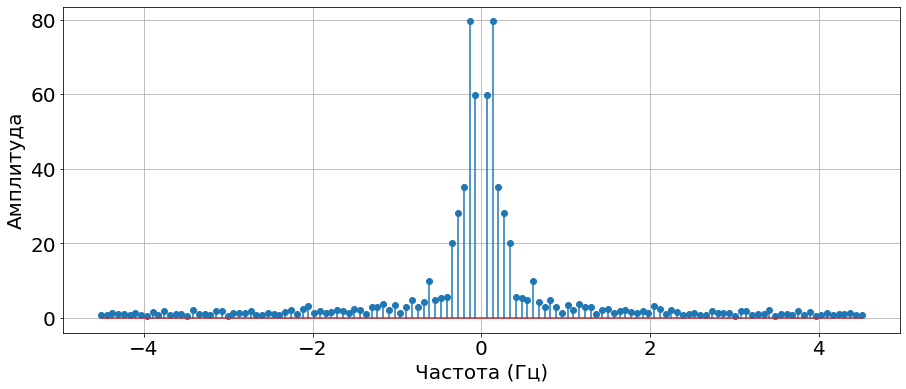

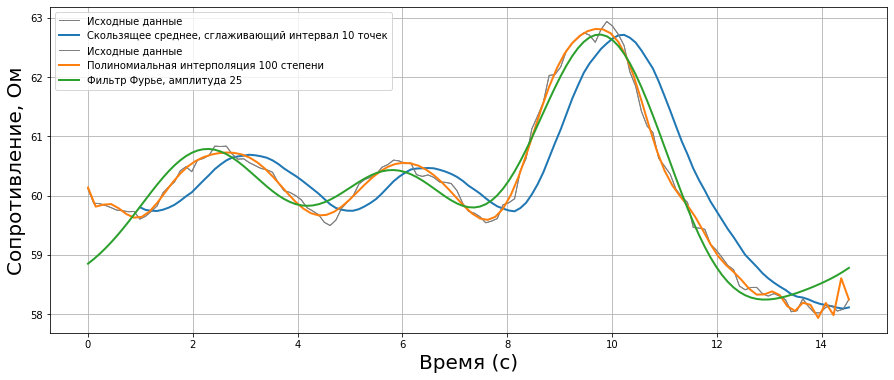

In [36]:
y,x=Data_Preprocessing(df.patient_1)
sma,p,f = filtr(x,y,10,100,25)

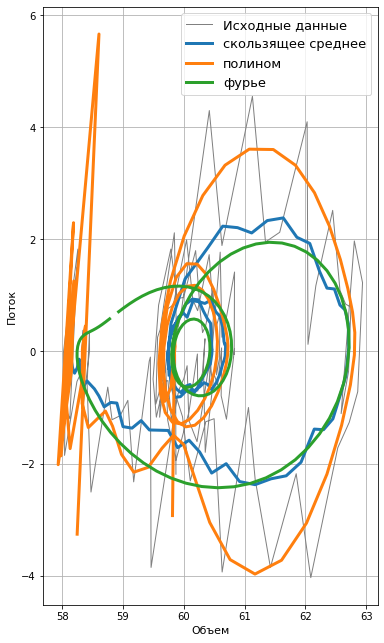

In [37]:
loop(sma,p,f)

(0           NaN
 1           NaN
 2           NaN
 3           NaN
 4           NaN
          ...   
 128    58.37825
 129    58.33150
 130    58.28635
 131    58.24945
 132    58.22430
 Name: patient_1, Length: 133, dtype: float64,
 array([60.11127163, 59.68110165, 60.0945301 , 60.70771564, 60.6270502 ,
        60.03740504, 59.69920642, 60.20013622, 60.60990532, 60.05218325,
        59.63748473, 60.77190221, 62.5201151 , 62.73782412, 61.25077073,
        59.71076942, 58.80867406, 58.28188112, 58.11891678, 58.21786932]),
 array([59.01208198+0.00000000e+00j, 59.14515931+4.00681994e-17j,
        59.27393715+2.00340997e-17j, 59.39621126+6.01022991e-17j,
        59.51029328-6.67803323e-18j, 59.6150696 +1.36899681e-16j,
        59.71002446+5.34242658e-17j, 59.79522626+0.00000000e+00j,
        59.8712779 -1.61633531e-16j, 59.9392344 +4.73750373e-17j,
        60.00049311+2.17884238e-17j, 60.05666344-4.88727495e-17j,
        60.10942443+5.90077044e-17j, 60.16037931+2.94306163e-17j,
        60

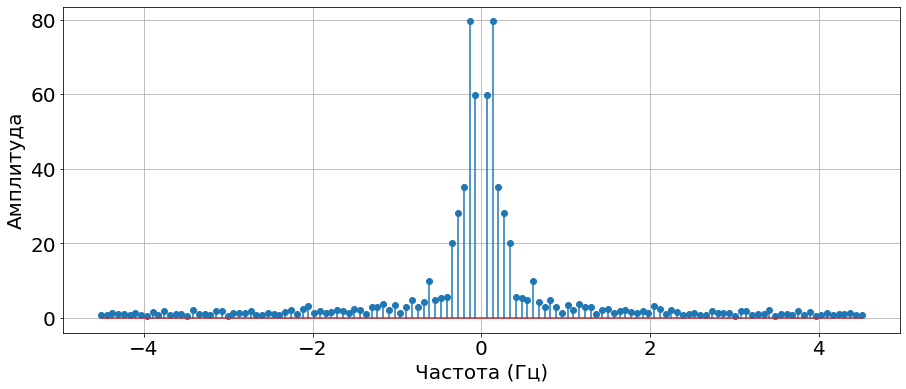

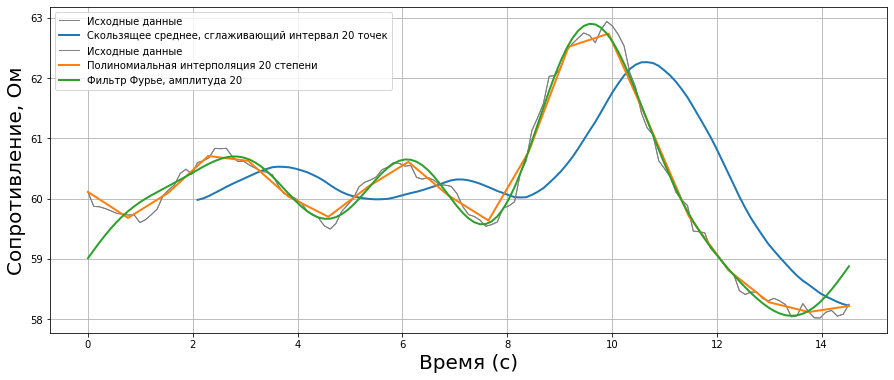

In [33]:
filtr(x,y,20,20,20)